In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('Global_Life_Expectancy_1960-2022.csv')

In [25]:
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,SpecialNotes
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Latin America & Caribbean,High income,64.152,64.537,64.752,65.132,...,75.601,75.683,75.617,75.903,76.072,76.248,75.723,74.626,74.992,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,South Asia,Low income,32.535,33.068,33.547,34.016,...,62.545,62.659,63.136,63.016,63.081,63.565,62.575,61.982,62.879,The reporting period for national accounts dat...
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Lower middle income,38.211,37.267,37.539,37.824,...,60.040,60.655,61.092,61.680,62.144,62.448,62.261,61.643,61.929,The World Bank systematically assesses the app...
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,Upper middle income,54.439,55.634,56.671,57.844,...,78.407,78.644,78.860,79.047,79.184,79.282,76.989,76.463,76.833,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Region', 'IncomeGroup', '1960', '1961', '1962', '1963', '1964', '1965',
       '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974',
       '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022', 'SpecialNotes'],
      dtype='object')

In [27]:
data_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       'Region', 'IncomeGroup', 'year', 'life_expectation']

In [28]:
df = pd.melt(data, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Region', 'IncomeGroup', 'SpecialNotes'],
                  var_name='year', value_name='life_expectation')

# 연도 데이터 필터링
df = df[df['year'].apply(lambda x: x.isdigit())]

df

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,SpecialNotes,year,life_expectation
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Latin America & Caribbean,High income,NaN,1960,64.152
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,South Asia,Low income,The reporting period for national accounts dat...,1960,32.535
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,1960,38.211
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,Upper middle income,NaN,1960,54.439
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,High income,NaN,1960,NaN
...,...,...,...,...,...,...,...,...,...
13666,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,Upper middle income,NaN,2022,79.524
13667,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Middle East & North Africa,Low income,The World Bank systematically assesses the app...,2022,63.720
13668,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Upper middle income,Fiscal year end: March 31; reporting period fo...,2022,61.480
13669,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Lower middle income,National accounts data were rebased to reflect...,2022,61.803


In [29]:
df.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1, inplace=True)

In [30]:
# 시간 순으로 데이터 정렬
df = df.sort_values(by=['Country Name', 'year'])

# 나라별로 그룹화하여 슬라이딩 윈도우 적용
# window_size = 3  # 슬라이딩 윈도우 크기
# df['rolling_mean'] = df.groupby('Country Name')['life_expectation'].rolling(window=window_size).mean().reset_index(0,drop=True)

# 결과 출력
df

,Country Name,Region,IncomeGroup,SpecialNotes,year,life_expectation
1,Afghanistan,South Asia,Low income,The reporting period for national accounts dat...,1960,32.535
218,Afghanistan,South Asia,Low income,The reporting period for national accounts dat...,1961,33.068
435,Afghanistan,South Asia,Low income,The reporting period for national accounts dat...,1962,33.547
652,Afghanistan,South Asia,Low income,The reporting period for national accounts dat...,1963,34.016
869,Afghanistan,South Asia,Low income,The reporting period for national accounts dat...,1964,34.494
...,...,...,...,...,...,...
12802,Zimbabwe,Sub-Saharan Africa,Lower middle income,National Accounts data are reported in Zimbabw...,2018,61.414
13019,Zimbabwe,Sub-Saharan Africa,Lower middle income,National Accounts data are reported in Zimbabw...,2019,61.292
13236,Zimbabwe,Sub-Saharan Africa,Lower middle income,National Accounts data are reported in Zimbabw...,2020,61.124
13453,Zimbabwe,Sub-Saharan Africa,Lower middle income,National Accounts data are reported in Zimbabw...,2021,59.253


In [31]:
# 라벨 인코딩을 위한 라이브러리 불러오기
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 초기화
label_encoder = LabelEncoder()

# 각 열에 대해 라벨 인코딩 적용
df['Country Name'] = label_encoder.fit_transform(df['Country Name'])
df['Region'] = label_encoder.fit_transform(df['Region'])
df['IncomeGroup'] = label_encoder.fit_transform(df['IncomeGroup'])

# 결과 출력
df

,Country Name,Region,IncomeGroup,SpecialNotes,year,life_expectation
1,0,5,1,The reporting period for national accounts dat...,1960,32.535
218,0,5,1,The reporting period for national accounts dat...,1961,33.068
435,0,5,1,The reporting period for national accounts dat...,1962,33.547
652,0,5,1,The reporting period for national accounts dat...,1963,34.016
869,0,5,1,The reporting period for national accounts dat...,1964,34.494
...,...,...,...,...,...,...
12802,216,6,2,National Accounts data are reported in Zimbabw...,2018,61.414
13019,216,6,2,National Accounts data are reported in Zimbabw...,2019,61.292
13236,216,6,2,National Accounts data are reported in Zimbabw...,2020,61.124
13453,216,6,2,National Accounts data are reported in Zimbabw...,2021,59.253


In [32]:
df.dropna(inplace=True)

In [33]:
# Country Name, year를 기준으로 데이터 정렬
df = df.sort_values(by=['Country Name', 'year'])

# Country Name, year을 슬라이딩 윈도우
window_size = 3

X_series = []
X_text = []
y = []

for country in df['Country Name'].unique():
    country_data = df[df['Country Name'] == country]
    for i in range(window_size, len(country_data)):
        X_series.append(country_data.iloc[i-window_size:i].drop(['life_expectation', 'SpecialNotes'], axis=1))
        X_text.append(country_data.iloc[i]['SpecialNotes'])
        y.append(country_data.iloc[i]['life_expectation'])
        
X_series = np.array(X_series, dtype=np.float32)
y = np.array(y, dtype=np.float32)



In [34]:
# tf_idf
from sklearn.feature_extraction.text import TfidfVectorizer

# tf-idf 벡터화
tfidf = TfidfVectorizer()

# 텍스트 데이터 벡터화
X_text = tfidf.fit_transform(X_text).toarray()

In [35]:
# test, train 데이터 분리

from sklearn.model_selection import train_test_split

X_series_train, X_series_test, X_text_train, X_text_test, y_train, y_test = train_test_split(X_series, X_text, y, test_size=0.2, random_state=42, shuffle=False)

In [36]:
# CNN LSTM 모델 생성

from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Flatten
from keras.layers import Input


#CNN LSTM 모델 생성
input1 = Input(shape=(X_series_train.shape[1], X_series_train.shape[2]))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(input1)
x = LSTM(64, activation='relu')(x)

input2 = Input(shape=(X_text_train.shape[1],))
y = Dense(64, activation='relu')(input2)

from keras.layers import concatenate
from keras.models import Model

result = concatenate([x, y])
output = Dense(1)(result)

model = Model(inputs=[input1, input2], outputs=output)

model.compile(optimizer='adam', loss='mse')


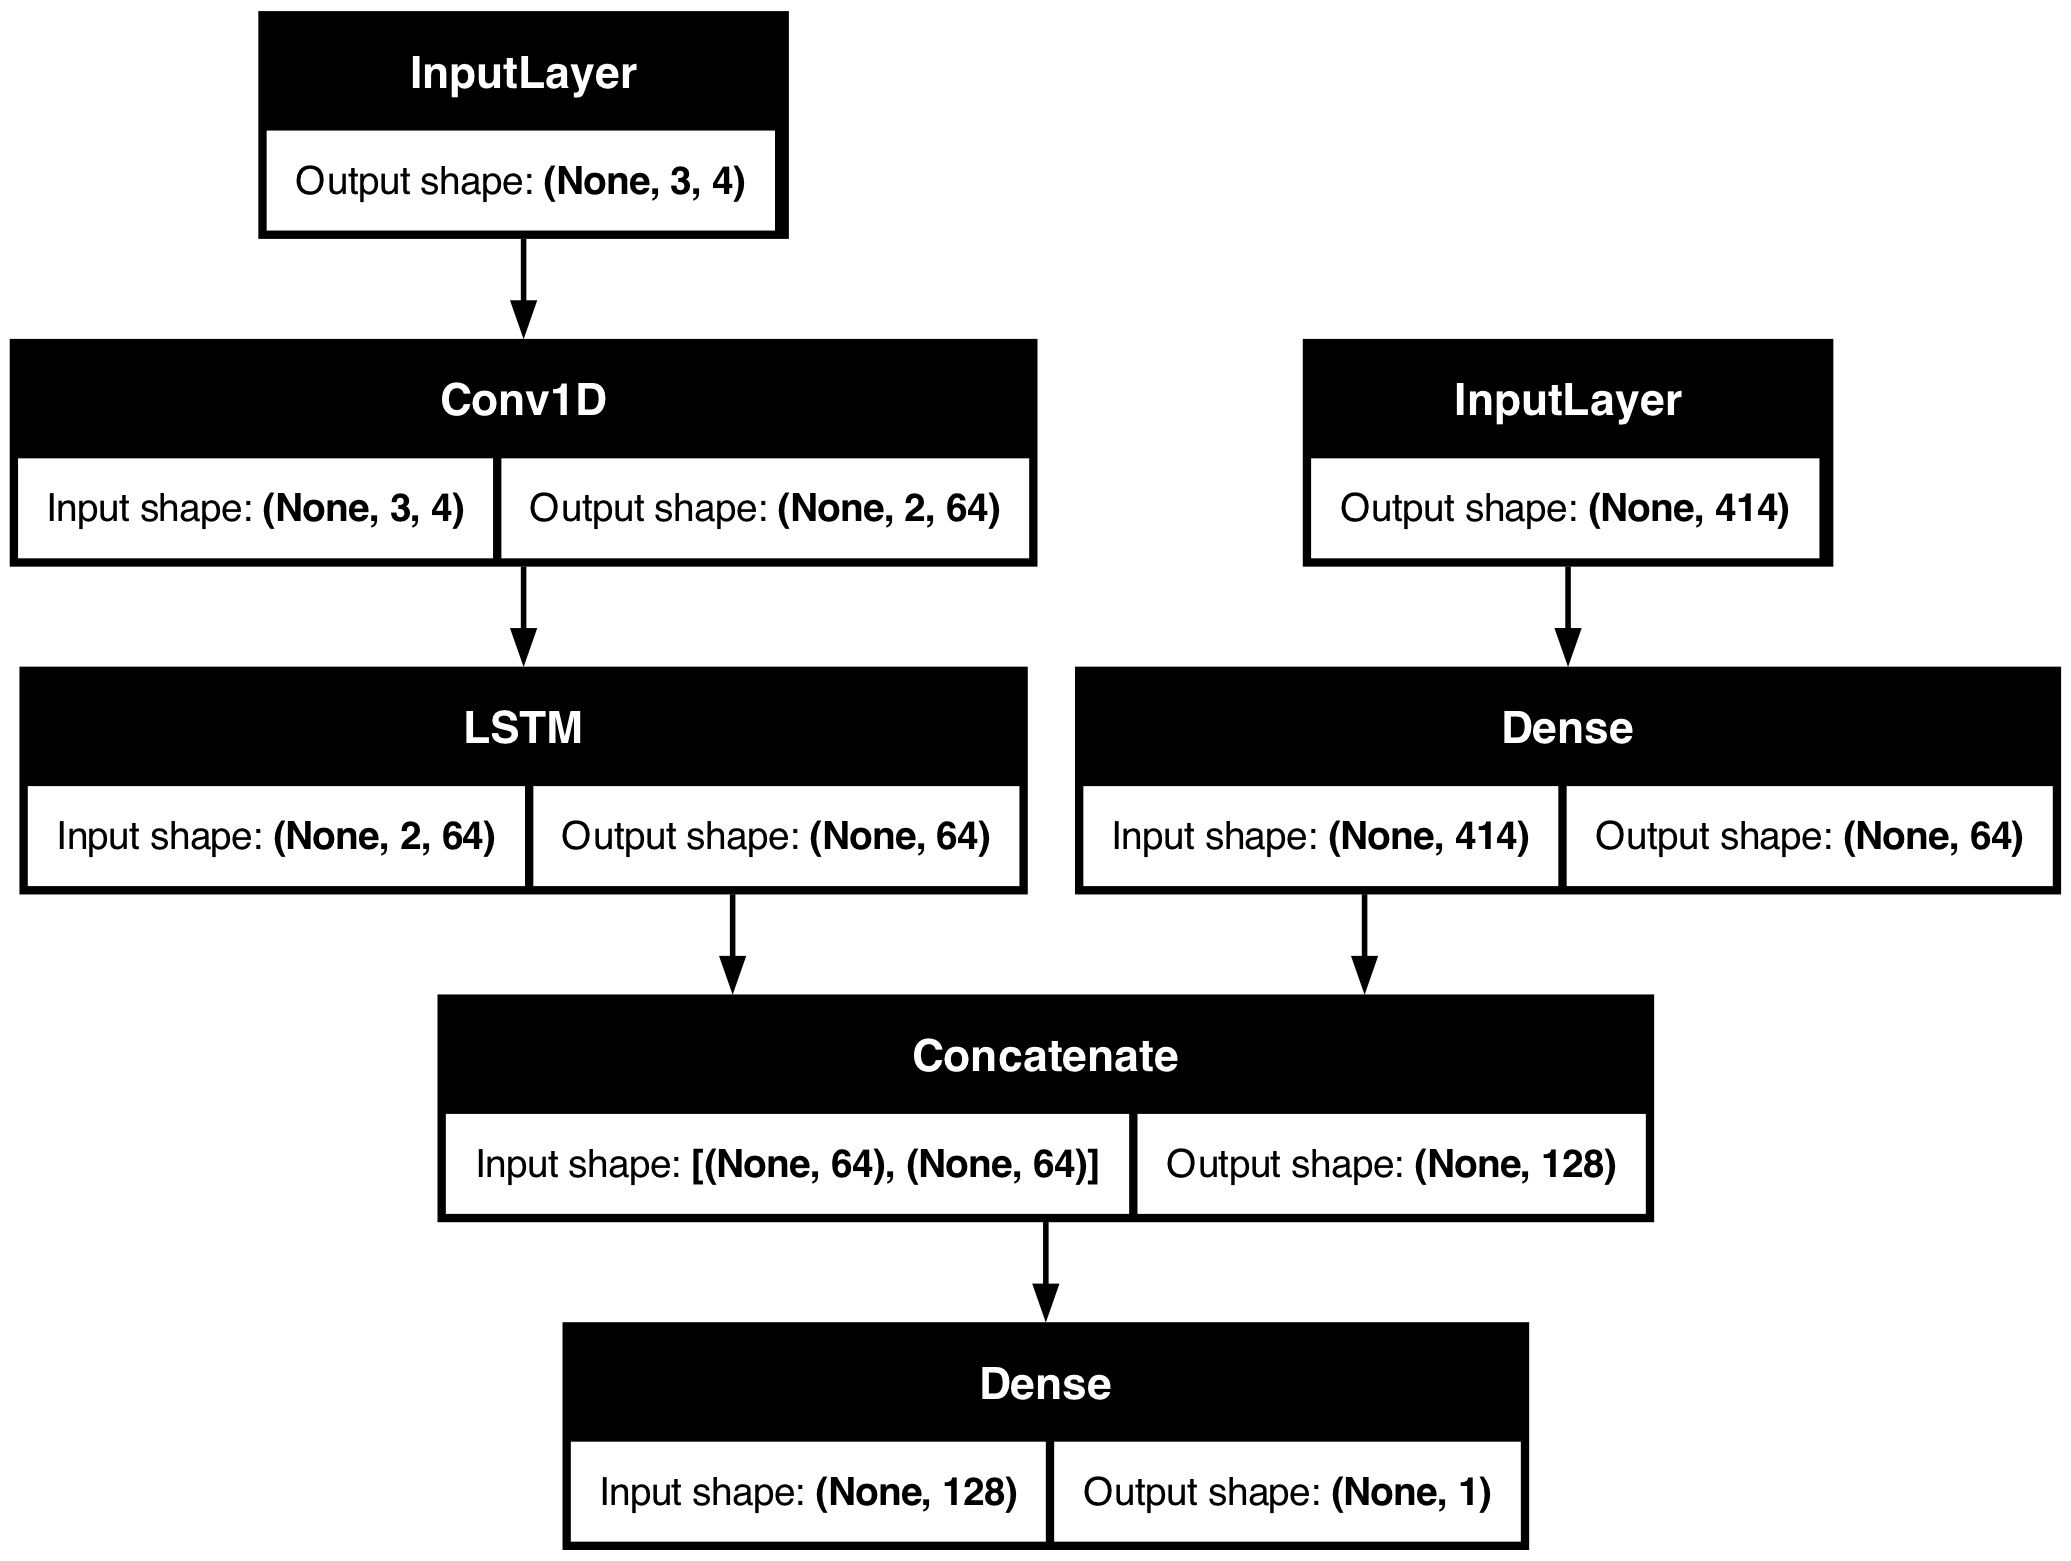

In [37]:
from keras.utils import plot_model

plot_model(model, show_shapes=True)

In [38]:
history = model.fit([X_series_train, X_text_train], y_train, epochs=100, batch_size=32, validation_data=([X_series_test, X_text_test], y_test))

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 169.2429 - val_loss: 121.0860
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 78.4242 - val_loss: 104.3686
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.9885 - val_loss: 101.4028
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62.7694 - val_loss: 102.1330
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 62.6582 - val_loss: 114.0055
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.9698 - val_loss: 100.5093
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53.8378 - val_loss: 97.9476
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51.4447 - val_loss: 110.8003
Epoch 9/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 48.3431 - val_loss: 95.8280
Epoch 10/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 55.4431 - val_loss: 98.7511
Epoch 11/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.1565 - val_loss: 97.6854
Epoch 12/10

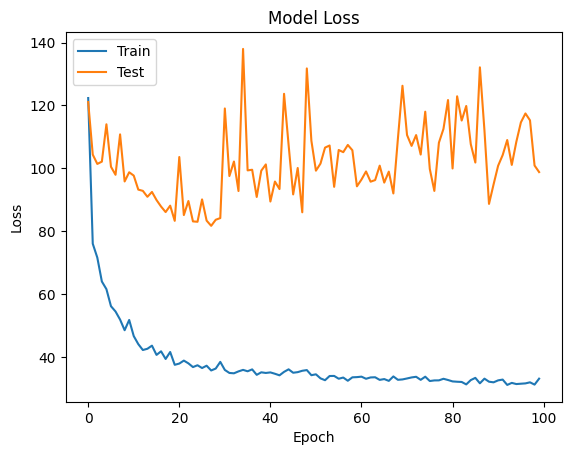

In [39]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
plot_loss(history)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


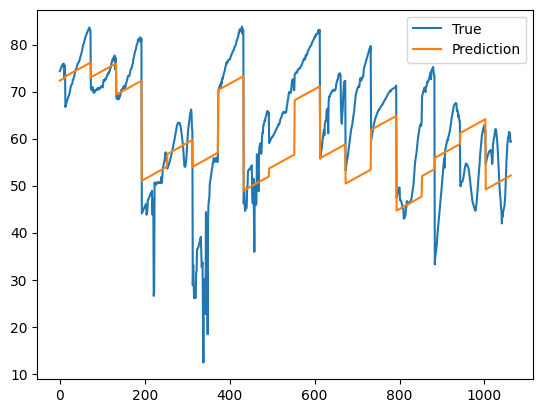

Mean Squared Error: 247.19286


In [40]:
pred = model.predict([X_series_test, X_text_test])

plt.plot(y_test, label='True')
plt.plot(pred, label='Prediction')
plt.legend()
plt.show()

# 결과 출력
mse = np.mean((y_test - pred)**2)
print('Mean Squared Error:', mse)

Epoch 1/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 432.8039 - val_loss: 149.8264
Epoch 2/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 117.2840 - val_loss: 145.3844
Epoch 3/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 118.5360 - val_loss: 147.1141
Epoch 4/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 110.5712 - val_loss: 151.5659
Epoch 5/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 109.8885 - val_loss: 143.9480
Epoch 6/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.0824 - val_loss: 121.7866
Epoch 7/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.1348 - val_loss: 135.5947
Epoch 8/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 92.5436 - val_loss: 92.2776
Epoch 9/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 77.1641 - val_loss: 91.5258
Epoch 10/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72.2605 - val_loss: 101.6100
Epoch 11/100
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 88.4300 - val_loss: 102.7421


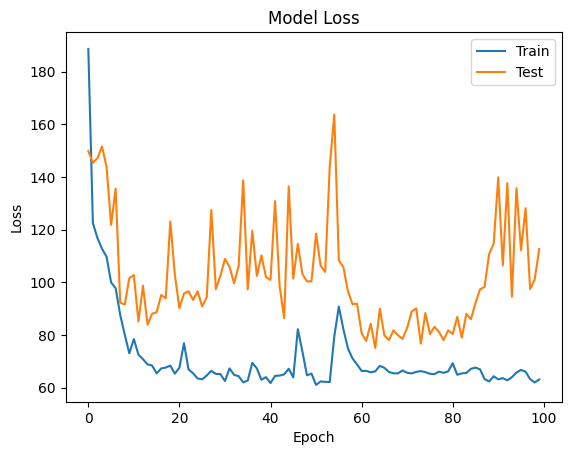

In [41]:
#CNN LSTM 모델 생성
input1 = Input(shape=(X_series_train.shape[1], X_series_train.shape[2]))
x = Conv1D(filters=64, kernel_size=2, activation='relu')(input1)
x = LSTM(64, activation='relu')(x)
output = Dense(1)(x)

model = Model(inputs=input1, outputs=output)

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_series_train, y_train, epochs=100, batch_size=32, validation_data=(X_series_test, y_test))

plot_loss(history)

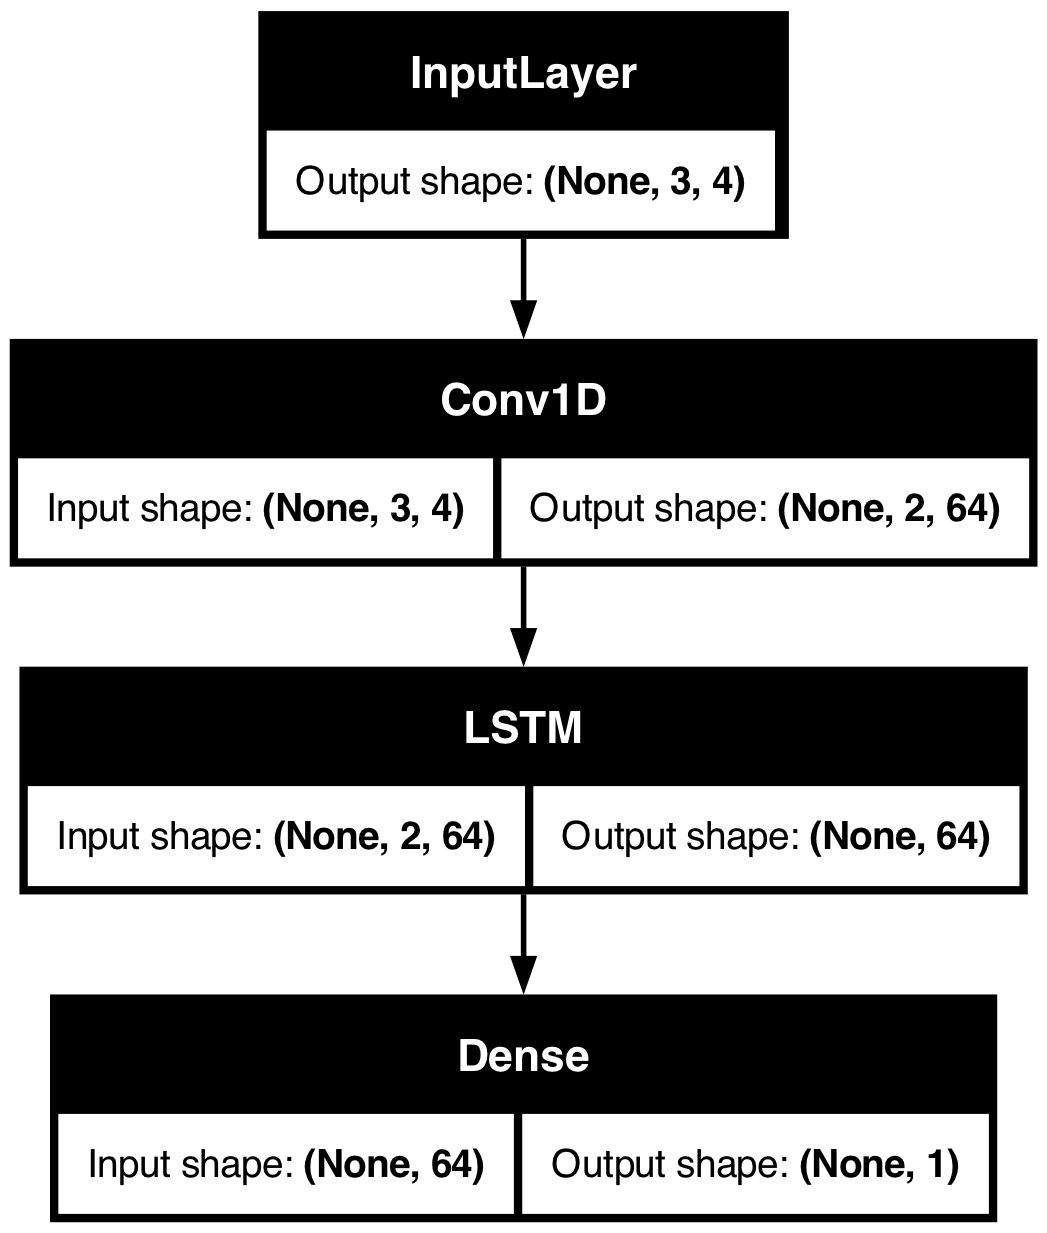

In [43]:
plot_model(model, show_shapes=True)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
204.23363


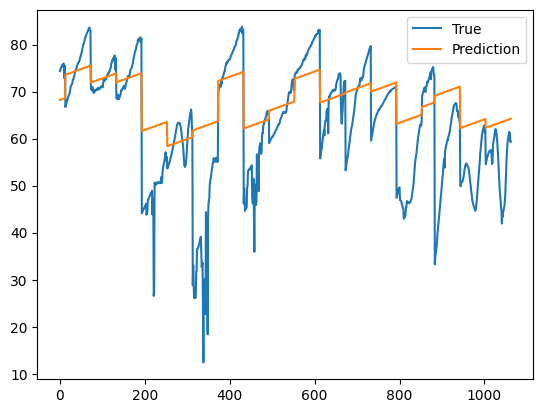

In [42]:
pred = model.predict(X_series_test)
mse = np.mean(np.square(pred - y_test))
print(mse)


plt.plot(y_test, label='True')
plt.plot(pred, label='Prediction')
plt.legend()
plt.show()